In this example, we are trying to estimate the price of car given its Year,	Selling_Price,	Present_Price,	Kms_Driven,	Fuel_Type,	Seller_Type,	Transmission,	and Previous Owner

Importing the Dependencies

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

Importing the data from a csv file into a pandas dataframe

In [125]:
#loading our dataset - source: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv

#loading the dataset into a pandas dataframe
cars = pd.read_csv('https://raw.githubusercontent.com/avinashjairam/avinashjairam.github.io/master/car%20data.csv')

Taking a peek at our dataset

In [126]:
#inspecting the first 5 rows of the dataframe
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


We will now generate a correlation matrix 


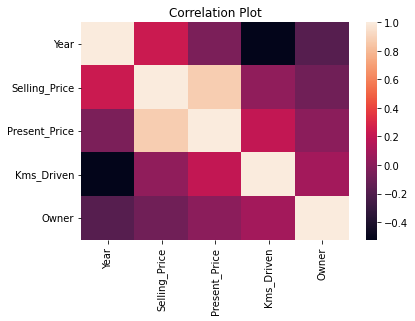

In [127]:
#pandas has a .corr() method which returns a correlation matrix
#we will pass the correlation matrix to a seaborn heatmap method to generate the graphic

sns.heatmap(cars.corr())
plt.title('Correlation Plot')
plt.show()

What features do we have in our dataset?

In [128]:
#Curious about what the columns in the dataset are?
#Use .columns 

cars.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

How much data do we have?

In [129]:
#Check the number of rows and columns - we have 301 records with 9 attributes
cars.shape

(301, 9)

What data types do we have?





In [130]:
#Let's learn some more about the dataset 
#The object data types are categorical data
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Do we have any missing values?

In [131]:
#Checking the number of missing values
# isnull() - tells you the number of missing values per column
cars.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

How does the fuel type vary?

In [132]:
#Checking the distribution of categorical data
print(cars.Fuel_Type.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


How does the seller type vary?

In [133]:
#Checking the distribution of categorical data
print(cars.Seller_Type.value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


How does the transmission type vary?

In [134]:
#Checking the distribution of categorical data
print(cars.Transmission.value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


Visualizing the distribution of Seller Types

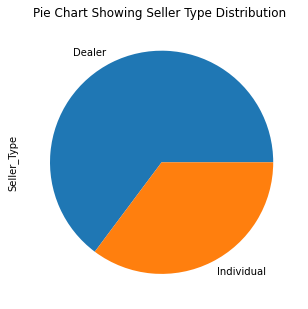

In [135]:
#Plotting the distribution of the Seller Types
data = cars.Seller_Type.value_counts()
transmission_count  = cars['Seller_Type'].value_counts()
plt.figure(figsize=(5,10))
data.plot.pie( title = 'Pie Chart Showing Seller Type Distribution ')
plt.show()

Visualizing the distribution of transmissions

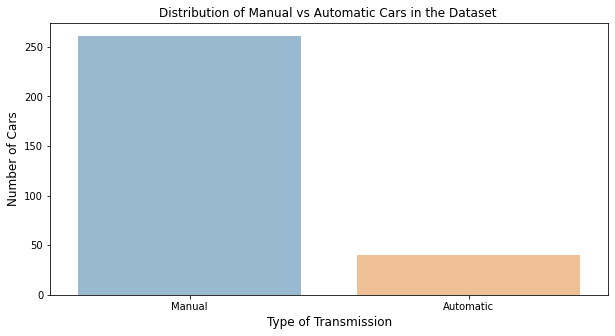

In [136]:
#Plotting the distribution of the Transmissions
transmission_count  = cars['Transmission'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x = transmission_count.index, y= transmission_count.values,  alpha=0.5)
plt.title('Distribution of Manual vs Automatic Cars in the Dataset ')
plt.ylabel('Number of Cars', fontsize=12)
plt.xlabel('Type of Transmission', fontsize=12)
plt.show()

Visualizing the fuel type distribution

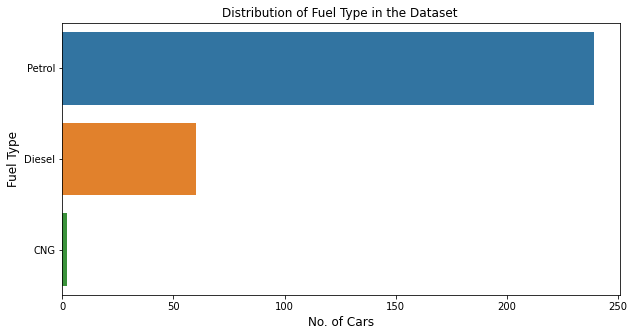

In [137]:
#Plotting the distribution of the Transmissions
fuel_type_count  = cars['Fuel_Type'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x= fuel_type_count.values, y = fuel_type_count.index,   alpha=1, orient = 'h')
plt.title('Distribution of Fuel Type in the Dataset ')
plt.ylabel('Fuel Type', fontsize=12)
plt.xlabel('No. of Cars', fontsize=12)
plt.show()

Let's take another look at our dataset. We need to do one hot encoding for the categorical columns - Fuel Type - Seller Type - Transmission

In [138]:
cars

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [139]:
fuel_type_encoding = pd.get_dummies(cars['Fuel_Type'])

The encoded fuel types

In [140]:
fuel_type_encoding

,CNG,Diesel,Petrol
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
296,0,1,0
297,0,0,1
298,0,0,1
299,0,1,0


Now we can drop the original Fuel Type Column now that we have done encoding

In [141]:
cars = cars.drop('Fuel_Type', axis = 1)

In [142]:
cars

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Dealer,Manual,0


Joining the encoded fuel_type_column to the original dataframe. Note - this can also be done by concat()

In [143]:
cars = cars.join(fuel_type_encoding)

We need to do the same for Seller Type and Transmission

In [144]:
#Note - we use drop_first when there are only two cases in a column
seller_type_encoding = pd.get_dummies(cars['Seller_Type'], drop_first=True)

In [145]:
cars = cars.drop('Seller_Type', axis=1)

In [146]:
cars

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Transmission,Owner,CNG,Diesel,Petrol
0,ritz,2014,3.35,5.59,27000,Manual,0,0,0,1
1,sx4,2013,4.75,9.54,43000,Manual,0,0,1,0
2,ciaz,2017,7.25,9.85,6900,Manual,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,Manual,0,0,0,1
4,swift,2014,4.60,6.87,42450,Manual,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Manual,0,0,1,0
297,brio,2015,4.00,5.90,60000,Manual,0,0,0,1
298,city,2009,3.35,11.00,87934,Manual,0,0,0,1
299,city,2017,11.50,12.50,9000,Manual,0,0,1,0


In [147]:
cars = cars.join(seller_type_encoding)

In [148]:
cars

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Transmission,Owner,CNG,Diesel,Petrol,Individual
0,ritz,2014,3.35,5.59,27000,Manual,0,0,0,1,0
1,sx4,2013,4.75,9.54,43000,Manual,0,0,1,0,0
2,ciaz,2017,7.25,9.85,6900,Manual,0,0,0,1,0
3,wagon r,2011,2.85,4.15,5200,Manual,0,0,0,1,0
4,swift,2014,4.60,6.87,42450,Manual,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Manual,0,0,1,0,0
297,brio,2015,4.00,5.90,60000,Manual,0,0,0,1,0
298,city,2009,3.35,11.00,87934,Manual,0,0,0,1,0
299,city,2017,11.50,12.50,9000,Manual,0,0,1,0,0


In [149]:
transmission_encoding = pd.get_dummies(cars['Transmission'], drop_first=True)

In [150]:
cars = cars.drop('Transmission', axis=1)

In [151]:
cars = cars.join(transmission_encoding)

We have now completed our encoding

In [152]:
cars

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,CNG,Diesel,Petrol,Individual,Manual
0,ritz,2014,3.35,5.59,27000,0,0,0,1,0,1
1,sx4,2013,4.75,9.54,43000,0,0,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,0,1,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,0,1,0,1
4,swift,2014,4.60,6.87,42450,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,0,0,1,0,0,1
297,brio,2015,4.00,5.90,60000,0,0,0,1,0,1
298,city,2009,3.35,11.00,87934,0,0,0,1,0,1
299,city,2017,11.50,12.50,9000,0,0,1,0,0,1


We will now separate our data into features (X) and targets(y)

We will not consider the Car_Name and Selling_Price in the feature set. Perhaps, you may it on your own?

Selling_Price is what we are trying to estimate, i.e. 'y'

In [153]:
#Splitting the dataset into features and targets
X = cars.drop(['Car_Name','Selling_Price'], axis = 1)
y = cars['Selling_Price']

Taking a look at our feature set

In [154]:
print(X)

     Year  Present_Price  Kms_Driven  Owner  CNG  Diesel  Petrol  Individual  \
0    2014           5.59       27000      0    0       0       1           0   
1    2013           9.54       43000      0    0       1       0           0   
2    2017           9.85        6900      0    0       0       1           0   
3    2011           4.15        5200      0    0       0       1           0   
4    2014           6.87       42450      0    0       1       0           0   
..    ...            ...         ...    ...  ...     ...     ...         ...   
296  2016          11.60       33988      0    0       1       0           0   
297  2015           5.90       60000      0    0       0       1           0   
298  2009          11.00       87934      0    0       0       1           0   
299  2017          12.50        9000      0    0       1       0           0   
300  2016           5.90        5464      0    0       0       1           0   

     Manual  
0         1  
1         1

Taking a look at our targets

In [155]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting the dataset into training and test sets in the ratio 70/30

In [156]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state=2)

Creating the model and fitting (training) on the training data

In [157]:
from sklearn.linear_model import LinearRegression

#Loading the Linear Regression Model
LR = LinearRegression()

LR.fit(X_train, y_train)

LinearRegression()

Making Predictions on the test data

In [158]:
#Model Evaluation
#Let's test our model on our training data
y_pred = LR.predict(X_test)

Calculating the coefficients


In [159]:
coefficients = LR.coef_
print(f'Coefficients {coefficients}')

Coefficients [ 4.02481200e-01  4.19354923e-01 -5.79253120e-06 -9.04856428e-01
 -1.28100017e+00  1.84046015e+00 -5.59459982e-01 -1.09180451e+00
 -1.67473309e+00]


Calculating the intercept

In [160]:
intercept = LR.intercept_
print(f'Intercept: {intercept}')

Intercept: -806.7227665009518


Calculating R-Squared

In [161]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R2: {r2}')

R2: 0.8242672907442306


Calculating Mean Squared Error

In [162]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

MSE: 2.535463354738231


Calculating Root Mean Squared Error

In [163]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

RMSE: 1.592313836760276


Calculating Mean Absolute Error

In [164]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE {mae}')

MAE 1.197154177766996
